Importy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

Przygotowanie danych do nauki

In [2]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'train')
test_dir = os.path.join(current_dir, 'test')
image_count = len(glob.glob(data_dir + '/*/*.jpg'))
print("Zestaw do trenowania")
print(image_count)
image_count = len(glob.glob(test_dir + '/*/*.jpg'))
print("Zestaw do testowania")
print(image_count)

Zestaw do trenowania
11520
Zestaw do testowania
1440


In [3]:
image_height=224
image_width=224
batch_size=32


In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height,image_width),
  batch_size=batch_size)


Found 11520 files belonging to 144 classes.
Using 9216 files for training.


In [5]:
test_data = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 1440 files belonging to 144 classes.


In [6]:
val_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 11520 files belonging to 144 classes.
Using 2304 files for validation.


Pokazanie przykładowych zdjęć

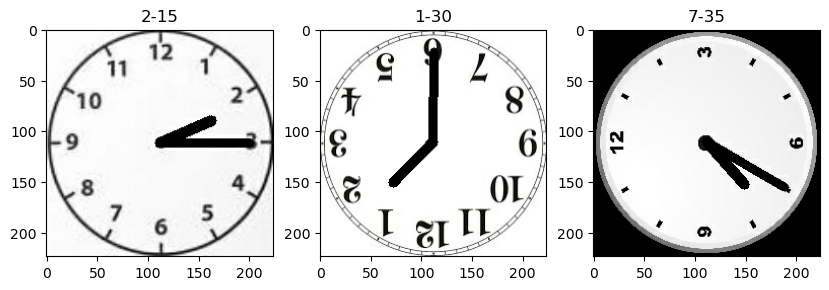

In [7]:
class_names = train_data.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
   

In [8]:
num_classes = len(class_names)
model = Sequential([
    Input(shape=(image_height, image_width, 3)),
    Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooli

In [10]:
epochs=10
learn = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)
test_loss,test_accuracy = model.evaluate(test_data)

Epoch 1/10
288/288 [==============================] - 127s 437ms/step - loss: 2.8164 - accuracy: 0.4278 - val_loss: 0.8442 - val_accuracy: 0.8047
Epoch 2/10
288/288 [==============================] - 84s 290ms/step - loss: 0.5078 - accuracy: 0.8910 - val_loss: 0.4816 - val_accuracy: 0.9002
Epoch 3/10
288/288 [==============================] - 96s 332ms/step - loss: 0.3951 - accuracy: 0.9210 - val_loss: 0.4321 - val_accuracy: 0.9145
Epoch 4/10
288/288 [==============================] - 86s 300ms/step - loss: 0.3015 - accuracy: 0.9438 - val_loss: 0.2962 - val_accuracy: 0.9392
Epoch 5/10
288/288 [==============================] - 80s 278ms/step - loss: 0.2180 - accuracy: 0.9553 - val_loss: 0.3271 - val_accuracy: 0.9388
Epoch 6/10
288/288 [==============================] - 74s 256ms/step - loss: 0.1833 - accuracy: 0.9615 - val_loss: 0.2812 - val_accuracy: 0.9488
Epoch 7/10
288/288 [==============================] - 71s 246ms/step - loss: 0.1173 - accuracy: 0.9745 - val_loss: 0.0973 - val_a

Test accuracy: 0.9854166507720947


1/1 [==============================] - 0s 149ms/step


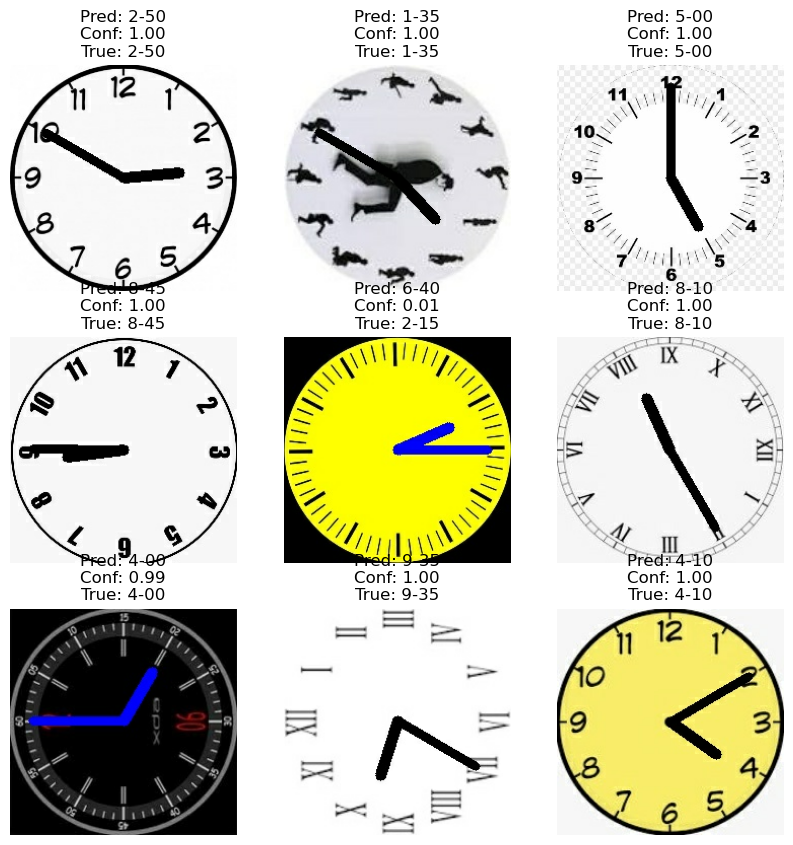

In [11]:
print(f"Test accuracy: {test_accuracy}")
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
    predictions = model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class = class_names[tf.argmax(predictions[i])]
        confidence = tf.reduce_max(predictions[i])
        actual_class = class_names[labels[i]]
        plt.title(f"Pred: {predicted_class}\nConf: {confidence:.2f}\nTrue: {actual_class}")
        plt.axis("off")

plt.show()

In [12]:
model.save('clocks_model.h5')